# File and libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_4_outlier_input.csv'


file_tag = "df_merch_scaling_input"

# DSLabs functions

In [49]:
%run "scripts/dslabs_functions.py"


# Data functions

In [50]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [51]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='returning_user'
vars: list[str] = data.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743351 entries, 0 to 743350
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       743351 non-null  float64
 1   device_category                  743351 non-null  float64
 2   device_mobile_brand_name         743351 non-null  float64
 3   device_mobile_model_name         743351 non-null  float64
 4   device_operating_system          743351 non-null  float64
 5   device_operating_system_version  743351 non-null  float64
 6   device_language                  743351 non-null  float64
 7   device_web_info_browser          743351 non-null  float64
 8   device_web_info_browser_version  743351 non-null  float64
 9   geo_region                       743351 non-null  float64
 10  geo_city                         743351 non-null  float64
 11  traffic_source_medium            743351 non-null  float64
 12  traffic

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [1]:
from pandas import DataFrame, Series
from sklearn.preprocessing import StandardScaler



def apply_strategy_1(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply scaling to only the feature columns
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_zscore[target] = target_data

    return df_zscore

data_1=apply_strategy_1(data)



data_1.columns


NameError: name 'data' is not defined

## Scale 1 Target Prep

In [53]:
data_1.columns

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')

## Scale 1 train/test split 

Labels=[0.0, 1.0]


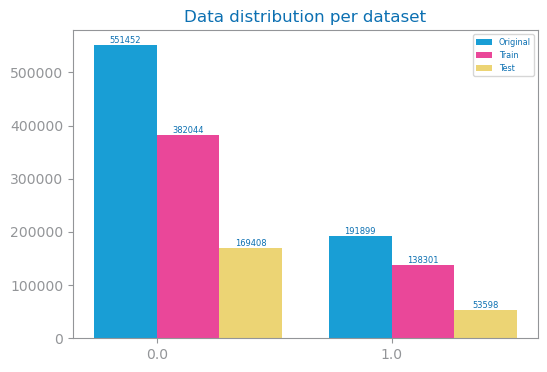

In [54]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Scale 1 evaluate

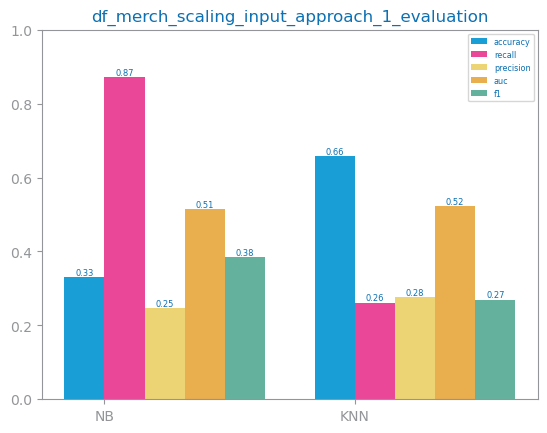

In [55]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [56]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_minmax[target] = target_data  # Add the unscaled target column back

    return df_minmax

data_2=apply_strategy_2(data)
data_2.columns

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')

## Scale 2 train/test split 

Labels=[0.0, 1.0]


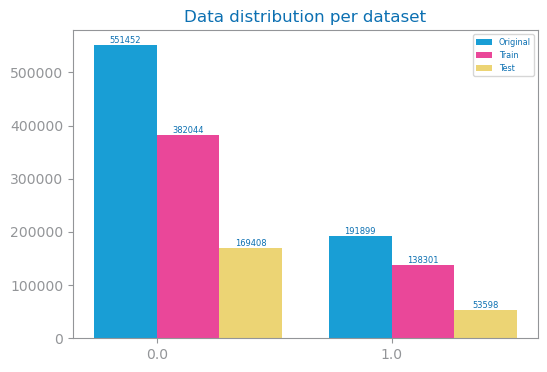

In [57]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Scale 2 evaluate

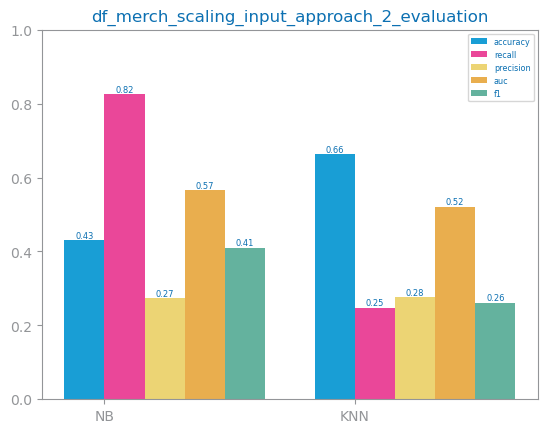

In [58]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# scaling plot

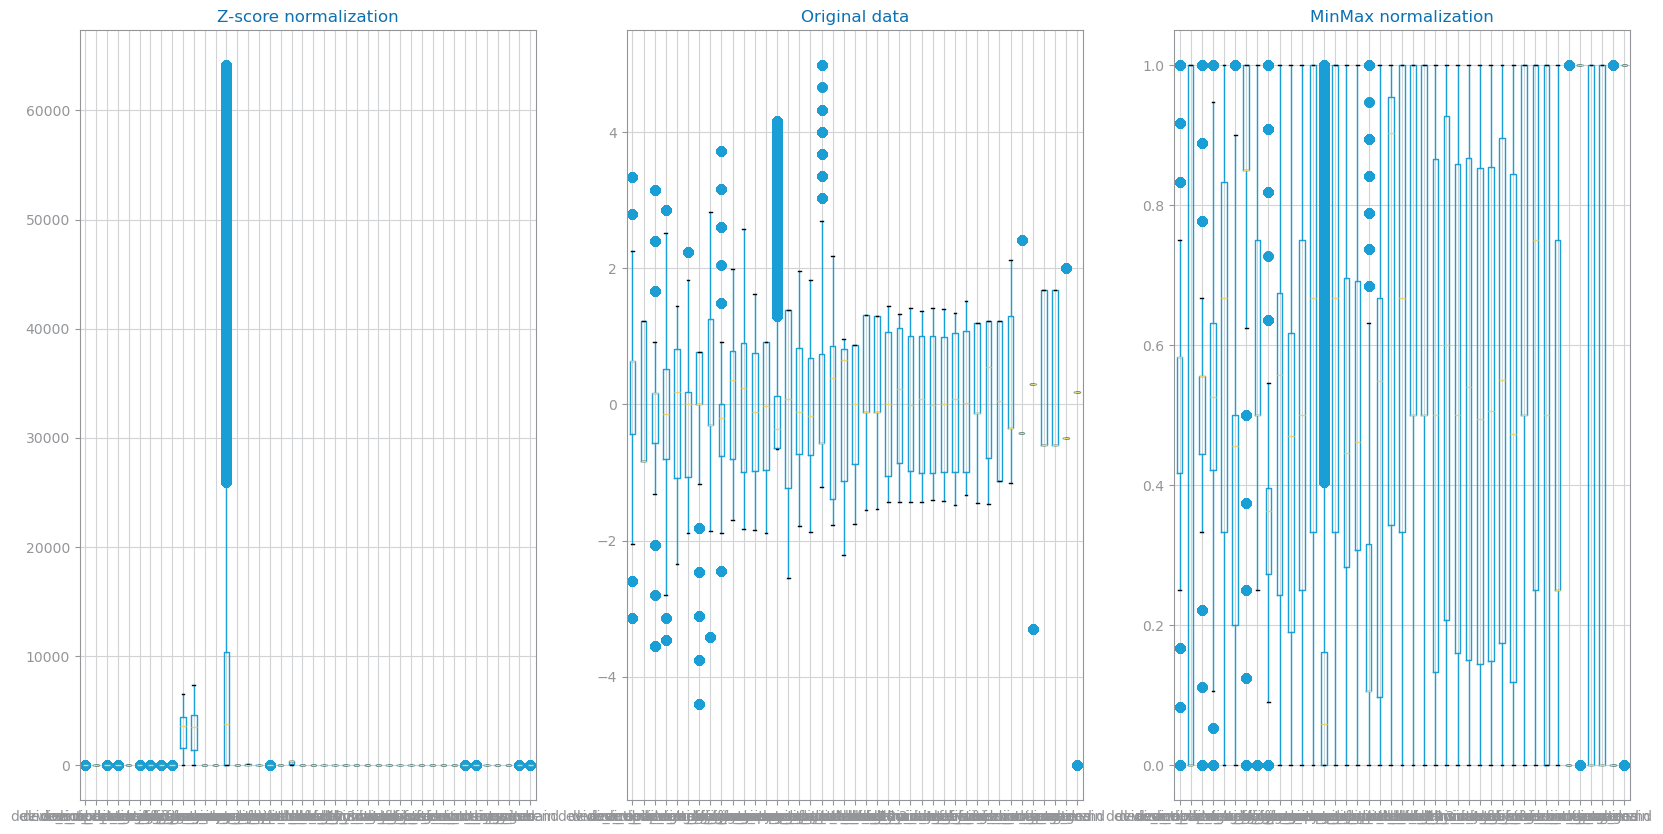

In [59]:
if evaluate == True:

    from matplotlib.pyplot import subplots, show

    fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
    axs[0, 1].set_title("Original data")
    data.boxplot(ax=axs[0, 0])

    axs[0, 0].set_title("Z-score normalization")
    data_1.boxplot(ax=axs[0, 1])

    axs[0, 2].set_title("MinMax normalization")
    data_2.boxplot(ax=axs[0, 2])
    show()

# Approach uplift comparison

## uplift df

In [63]:
if evaluate ==True:

    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   0.329682  0.871712  0.246774  0.514952  0.384656   0.431069   
KNN           0.658386  0.261689  0.276997  0.522792  0.269125   0.663431   

                                                       Uplift            \
               recall precision       auc        f1  accuracy    recall   
Naive Bayes  0.824658  0.273385  0.565601  0.410638  0.101387 -0.047054   
KNN          0.247547  0.276445  0.521278  0.261199  0.005045 -0.014142   

                                           
            precision       auc        f1  
Naive Bayes  0.026610  0.050649  0.025982  
KNN         -0.000551 -0.001514 -0.007926

# Analysis

- NB (better on approach 2): 
    - Scale1 accuracy 0.33, recall 0.87, auc 0.51
    - scale2 accuracy 0.43 recall 0.82, auc 0.56
- KNN: no significant uplifts between approaches
- overall scale 2 vs outliers treatment
    - very significant improved recall
    - significant accuracy loss


# save to csv

In [66]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_2(data_save)
        
    data_save.to_csv(f"data/df_merch_5_scaler_input.csv", index=False)
    

    print(data_save.columns)

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')


## train test csv

In [69]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"data/df_merch_5_scaler_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_5_scaler_input_test.csv", index=False)
    print(test.columns)

Labels=[0.0, 1.0]
Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')
Index(['event_name', 'device_cate